In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math

f3 = sp.symbols('f3')
L2 = sp.symbols('L2')
t2 = sp.symbols('t2')
t3 = sp.symbols('t3')
f2 = sp.symbols('f2')
f1 = sp.symbols('f1')
f3=75 
f2=-75
f1=150
phi1 = 25.4  # (mm)
phi2 = 25.4  # (mm)
taille_pixel=0.00345    # (microm)
# I define a function for the translation matrix
def Mt(d):
    '''
        Translation ray transfer matrix
    '''
    M = np.array([[1, d],
                  [0, 1]])
    return M

# I define a function for the thin lens matrix
def Ml(f):
    '''
        Thin lens ray transfer matrix
    '''
    M = np.array([[1, 0],
                  [-1/f, 1]])
    return M

# I create a function for the total system matrix M
def M_system(t2, t3, L):
    '''
        Computes the total system transfer matrix
    '''
    M = Mt(d=L-t3-t2)@Ml(f=75)@Mt(d=t3)@Ml(f=-75)@Mt(d=t2)@Ml(f=150)@Mt(d=1000)
    return M
plt.close()
plt.close()
plt.close()
L = 180


fig_deltaz=plt.figure("deltaz",dpi=96)
fig_res=plt.figure("res",dpi=96)
fig_A = plt.figure("A",dpi=96)

# print(M_system(t2,t3, L))

#x = sp.symbols('x') # symbolize x
t2range = range(0, 76) # range of values for s
r2_f_alpha = -np.arctan((phi2 - taille_pixel) /(2*f3))
r2_f_y = taille_pixel/2
# print(M_tot) # Imprime la matrice totale pour vérification

r2_i_y, r2_i_alpha = sp.symbols('r2_i_y r2_i_alpha') #Définition des variables à résoudre
r2_i = sp.Matrix([r2_i_y, r2_i_alpha])
data_dic={}

<Figure size 576x384 with 0 Axes>

<Figure size 576x384 with 0 Axes>

<Figure size 576x384 with 0 Axes>

In [6]:
L_list=np.linspace(177,200,5)
for L in L_list:
    # print(f"L={L}")
    # Iteratively solve the problem
    t3_solutions = [] # empty array for solutions
    deltaz_sol=[] # empty array for solutions
    A_sol = []
    res_sol = []
    for t2 in t2range:
        Mtot = M_system(t2, t3, L) # compute the system's matrix
        B = Mtot[0, 1] # get B(x) from system's matrix
        t3_sol = sp.solve(B) # Solve B(x) = 0 Carefull, there may be many solutions...
        t3_solutions.append(max(t3_sol)) # add solution to list
    # print(t3_solutions)
    for i,t2 in enumerate(t2range):
        Mtot = M_system(t2, t3_solutions[i], L)
        #Calcul pour A
        A=Mtot[0,0]
        A_sol.append(A)
        #Calcul pour res
        res_sol.append(np.abs(taille_pixel/A))

        #Calcul pour la profondeur de champs
        eq = sp.Eq(Mtot * r2_i, sp.Matrix([r2_f_y, r2_f_alpha])) #Définition de l'équation à résoudre
        solution = sp.solve(eq, (r2_i_y, r2_i_alpha)) # Solution de l'angle et hauteur du rayon 2 initial
        r2_i_alpha_value = solution[r2_i_alpha] # Extrait l'angle du vecteur solution
        r2_i_y_value = solution[r2_i_y] #Extrait la hauteur du vecteur solution
        deltaz = abs(2 * r2_i_y_value / math.tan(r2_i_alpha_value)) #Calcul de la résolution avec l'angle et la hauteur
        deltaz_sol.append(deltaz)
    data_dic[f"A_L{L}"]=A_sol
    data_dic[f"res_L{L}"]=res_sol
    data_dic[f"deltaz_L{L}"]=deltaz_sol
    # plt.figure("A")
    # plt.plot(t2range, A_sol, '.-',label=f"L={L}") 

    # plt.figure("res")
    # plt.plot(t2range, 1000*res_sol, '.-',label=f"L={L}") 

    # plt.figure("deltaz")
    # plt.plot(t2range, deltaz_solutions, '.-',label=f"L={L}")

In [19]:
new_l_list=np.linspace(177.5,182,5)
for L in new_l_list:
    # print(f"L={L}")
    # Iteratively solve the problem
    t3_solutions = [] # empty array for solutions
    deltaz_sol=[] # empty array for solutions
    A_sol = []
    res_sol = []
    for t2 in t2range:
        Mtot = M_system(t2, t3, L) # compute the system's matrix
        B = Mtot[0, 1] # get B(x) from system's matrix
        t3_sol = sp.solve(B) # Solve B(x) = 0 Carefull, there may be many solutions...
        t3_solutions.append(max(t3_sol)) # add solution to list
    # print(t3_solutions)
    for i,t2 in enumerate(t2range):
        Mtot = M_system(t2, t3_solutions[i], L)
        #Calcul pour A
        A=Mtot[0,0]
        A_sol.append(A)
        #Calcul pour res
        res_sol.append(np.abs(taille_pixel/A))

        #Calcul pour la profondeur de champs
        eq = sp.Eq(Mtot * r2_i, sp.Matrix([r2_f_y, r2_f_alpha])) #Définition de l'équation à résoudre
        solution = sp.solve(eq, (r2_i_y, r2_i_alpha)) # Solution de l'angle et hauteur du rayon 2 initial
        r2_i_alpha_value = solution[r2_i_alpha] # Extrait l'angle du vecteur solution
        r2_i_y_value = solution[r2_i_y] #Extrait la hauteur du vecteur solution
        deltaz = abs(2 * r2_i_y_value / math.tan(r2_i_alpha_value)) #Calcul de la résolution avec l'angle et la hauteur
        deltaz_sol.append(deltaz)
    data_dic[f"A_L{L}"]=A_sol
    data_dic[f"res_L{L}"]=res_sol
    data_dic[f"deltaz_L{L}"]=deltaz_sol

Total_L_list=np.concatenate((L_list,new_l_list))

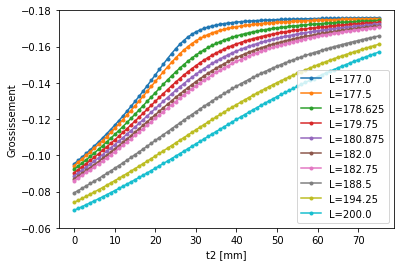

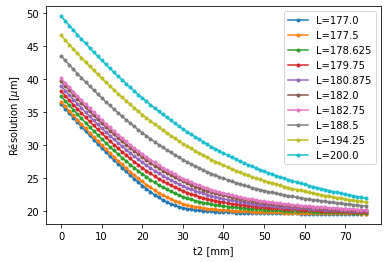

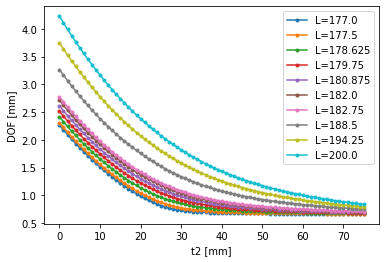

In [21]:
Total_L_list=np.sort(Total_L_list)
for L in Total_L_list:
    plt.figure("A")
    plt.plot(t2range, data_dic[f"A_L{L}"], '.-',label=f"L={L}") 

    plt.figure("res")
    plt.plot(t2range, np.array(data_dic[f"res_L{L}"])*1000, '.-',label=f"L={L}") 

    plt.figure("deltaz")
    plt.plot(t2range, data_dic[f"deltaz_L{L}"], '.-',label=f"L={L}")


plt.figure("A")
plt.legend()
plt.ylim(-0.06, -0.180)
plt.xlabel('t2 [mm]')
plt.ylabel('Grossissement')

plt.figure("res")
plt.legend()
plt.xlabel('t2 [mm]')
plt.ylabel(f'Résolution [$\mu$m]')

plt.figure("deltaz")
plt.legend()
plt.xlabel('t2 [mm]')
plt.ylabel('DOF [mm]')

plt.show()
